In [1]:
!pip install ultralytics

In [2]:
! pip install twilio

  Using cached PyJWT-2.8.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached aiohttp-3.9.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.4 kB)
  Using cached aiohttp_retry-2.8.3-py3-none-any.whl.metadata (8.9 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached frozenlist-1.4.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.2 kB)
  Using cached yarl-1.9.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (31 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.9 MB/s eta 0:00:00a 0:00:01
Using cached aiohttp-3.9.3-cp312-cp312-macosx_11_0_arm64.whl (389 kB)
Using cached aiohttp_retry-2.8.3-py3-none-any.whl (9.8 kB)
Using cached PyJWT-2.8.0-py3-none-any.whl (22 kB)
Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached frozenlist-1.4.1-cp312-cp312-mac

In [2]:
import ultralytics

In [3]:
from ultralytics import YOLO

In [2]:
def test_mail_alert():
    print('This is the alert message !!')

In [4]:
! pip3 install twilio

In [3]:
from ultralytics import YOLO
import twilio
from twilio.rest import Client
camera_label='CSM-A Camera --->'  #Add your camera label here if you

account_sid='AC8836dfeb51a6f5ea7f0b97cf4e7b2696'
auth_token = 'ade6965347c16992392b4af33c216e2d'
twilio_phone_number = 'whatsapp:+14155238886'
recipient_phone_numbers = ['whatsapp:+919502152068', 'whatsapp:+919000608068', 'whatsapp:+919441841865']

client = Client(account_sid, auth_token)

def send_whatsapp_alert(alert_message, to):
  message = client.messages.create(
    from_=twilio_phone_number,
    body=alert_message,
    to=to
  )
  print(f"Message SID: {message.sid}")

alert_message4 = "{} Student is sleeping in class 😴, Check the cameras immediately !!!".format(camera_label)

alert_message1 = "{} Student is using phone 📲 in class, Check the cameras immediately !!!".format(camera_label)

alert_message2 = "{} Voilene activity Detected ❌, Check the cameras immediately !!!".format(camera_label)

message_sent1 = False
message_sent2 = False
message_sent3 = False


to = 'whatsapp:+918179533097'


model_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/best-2.pt"
model = YOLO(model_path)

from PIL import Image

image = Image.open("/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/fightimage.png")

res = model.predict(image)
print(res)
res = res[0]
res_tensor = res.boxes.cls

res_numpy = res_tensor.numpy()
# print('this is result')
# print(res_numpy)



for i in res_numpy:
    if i == 1 and not message_sent1:
        # send_whatsapp_alert(alert_message1, to)
        for recipient in recipient_phone_numbers:
            send_whatsapp_alert(alert_message1, recipient)
        message_sent1=True

    if i == 2 and not message_sent2:
        # send_whatsapp_alert(alert_message2, to)
        for recipient in recipient_phone_numbers:
            send_whatsapp_alert(alert_message2, recipient)
        message_sent2=True

    if i == 3 and not message_sent3:
        # send_whatsapp_alert(alert_message3, to)
        for recipient in recipient_phone_numbers:
            send_whatsapp_alert(alert_message4, recipient)
        message_sent3=True

    elif(i==1 and i==2 and i==4):
        send_whatsapp_alert(alert_message1,to)
        send_whatsapp_alert(alert_message2,to)
        send_whatsapp_alert(alert_message4,to)
        break
    else:
        print('no detections') 
    
  


0: 704x800 1 Violence, 514.2ms
Speed: 5.9ms preprocess, 514.2ms inference, 8.8ms postprocess per image at shape (1, 3, 704, 800)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'NonViolence', 1: 'Using Phone', 2: 'Violence', 3: 'normal', 4: 'sleep'}
obb: None
orig_img: array([[[ 48,  42, 158],
        [ 48,  42, 158],
        [ 48,  42, 158],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 48,  42, 158],
        [ 48,  42, 158],
        [ 48,  42, 158],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 48,  42, 158],
        [ 48,  42, 158],
        [ 48,  42, 158],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 46,  98, 150],
        [ 48, 101, 152],
        [ 50, 102, 154],
        ...,
        [ 95, 121, 121],
        [

ConnectionError: HTTPSConnectionPool(host='api.twilio.com', port=443): Max retries exceeded with url: /2010-04-01/Accounts/AC8836dfeb51a6f5ea7f0b97cf4e7b2696/Messages.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x17bf35970>: Failed to resolve 'api.twilio.com' ([Errno 8] nodename nor servname provided, or not known)"))

In [5]:
from ultralytics import YOLO
import twilio
from twilio.rest import Client
import cv2
import time  # Import the time module
camera_label='CSM-A Camera --->'  

account_sid = 'AC8836dfeb51a6f5ea7f0b97cf4e7b2696'
auth_token = 'ade6965347c16992392b4af33c216e2d'
twilio_phone_number = 'whatsapp:+14155238886'
cooldown_period = 60
recipient_phone_numbers = ['whatsapp:+919502152068', 'whatsapp:+919000608068', 'whatsapp:+919441841865']

client = Client(account_sid, auth_token)

def send_whatsapp_alert(alert_message, to):
    message = client.messages.create(
        from_=twilio_phone_number,
        body=alert_message,
        to=to
    )
    print(f"Message SID: {message.sid}")
    
alert_message4 = "{} Student is sleeping in class 😴, Check the cameras immediately !!!".format(camera_label)

alert_message1 = "{} Student is using phone 📲 in class, Check the cameras immediately !!!".format(camera_label)

alert_message2 = "{} Voilene activity Detected ❌, Check the cameras immediately !!!".format(camera_label)

to = 'whatsapp:+918179533097'

model_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Major.pt"
model = YOLO(model_path)

# video_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Use of smartphones.mp4"
# cap = cv2.VideoCapture(video_path)
cap=cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to grab a frame.")
        break
    
    # Reset message sent flags for each frame
    message_sent1 = False
    message_sent2 = False
    message_sent3 = False
    
    res = model.predict(frame)
    res = res[0]
    res_tensor = res.boxes.cls
    res_numpy = res_tensor.numpy()

    for i in res_numpy:
        if i == 1 and not message_sent1:
            for recipient in recipient_phone_numbers:
                send_whatsapp_alert(alert_message1, recipient)
            message_sent1 = True
            # time.sleep(cooldown_period)

        if i == 2 and not message_sent2:
            for recipient in recipient_phone_numbers:
                send_whatsapp_alert(alert_message2, recipient)
            message_sent2 = True
            # time.sleep(cooldown_period)

        if i == 4 and not message_sent3:
            for recipient in recipient_phone_numbers:
                send_whatsapp_alert(alert_message4, recipient)
            message_sent3 = True
            # time.sleep(cooldown_period)

        elif (i==1 and i==2 and i==4):
            send_whatsapp_alert(alert_message1, to)
            send_whatsapp_alert(alert_message2, to)
            send_whatsapp_alert(alert_message4, to)
            break
        else:
            print('no detections')

    # Display the frame with bounding boxes
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x800 1 normal, 388.8ms
Speed: 2.2ms preprocess, 388.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 800)
no detections

0: 480x800 1 normal, 1 sleep, 330.5ms
Speed: 2.1ms preprocess, 330.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 800)
no detections


ConnectionError: HTTPSConnectionPool(host='api.twilio.com', port=443): Max retries exceeded with url: /2010-04-01/Accounts/AC8836dfeb51a6f5ea7f0b97cf4e7b2696/Messages.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x2961073b0>: Failed to resolve 'api.twilio.com' ([Errno 8] nodename nor servname provided, or not known)"))

In [11]:
from ultralytics import YOLO
import twilio
from twilio.rest import Client
import cv2
import time  # Import the time module


account_sid = 'AC8836dfeb51a6f5ea7f0b97cf4e7b2696'
auth_token = 'ade6965347c16992392b4af33c216e2d'
twilio_phone_number = 'whatsapp:+14155238886'
cooldown_period = 60
recipient_phone_numbers = ['whatsapp:+919502152068', 'whatsapp:+919000608068', 'whatsapp:+919441841865']

client = Client(account_sid, auth_token)

def send_whatsapp_alert(alert_message, to):
    message = client.messages.create(
        from_=twilio_phone_number,
        body=alert_message,
        to=to
    )
    print(f"Message SID: {message.sid}")
     
    time.sleep(1)

alert_message1 = "Student is sleeping in class 😴, Check the cameras immediately !!!"
alert_message2 = "Student is using phone 📲 in class, Check the cameras immediately !!!"
alert_message3 = "Violence activity Detected ❌, Check the cameras immediately !!!"

to = 'whatsapp:+918179533097'

# model_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Ravi_best.pt"
model_path="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/best-2.pt"
model = YOLO(model_path)

video_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/fight2.mp4"
cap = cv2.VideoCapture(video_path)
# cap=cv2.VideoCapture(0)

# Dictionary to keep track of whether a message has been sent for each activity
activity_messages_sent = {
    1: False,  # Sleeping
    2: False,  # Using phone
    3: False   # Violence
}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to grab a frame.")
        break
    
    # Reset message sent flags for each frame
    activity_messages_sent = {activity: False for activity in activity_messages_sent}
    
    res = model.predict(frame)
    res = res[0]
    res_tensor = res.boxes.cls
    res_numpy = res_tensor.numpy()

    for i in res_numpy:
        if i == 1 and not activity_messages_sent[1]:
            for recipient in recipient_phone_numbers:
                send_whatsapp_alert(alert_message1, recipient)
            activity_messages_sent[1] = True

        if i == 2 and not activity_messages_sent[2]:
            for recipient in recipient_phone_numbers:
                send_whatsapp_alert(alert_message2, recipient)
            activity_messages_sent[2] = True

        if i == 3 and not activity_messages_sent[3]:
            for recipient in recipient_phone_numbers:
                send_whatsapp_alert(alert_message3, recipient)
            activity_messages_sent[3] = True

    # Display the frame with bounding boxes
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 800x480 1 Violence, 376.6ms
Speed: 1.8ms preprocess, 376.6ms inference, 0.8ms postprocess per image at shape (1, 3, 800, 480)
Message SID: SMbf455258b8218b462ed9898042a89aee
Message SID: SM50dde4f864b6aa7af8f97d95eaac0e6c
Message SID: SM39f6bb82c6435979bfd44cece5e81898

0: 800x480 1 Violence, 357.1ms
Speed: 3.0ms preprocess, 357.1ms inference, 0.5ms postprocess per image at shape (1, 3, 800, 480)
Message SID: SM1d4e2c79f59d19f7990f58ff80c02871


KeyboardInterrupt: 

In [13]:
from ultralytics import YOLO
import twilio
from twilio.rest import Client
import cv2
import time  # Import the time module
camera_label='CSM-A Camera --->'  


account_sid = 'AC8836dfeb51a6f5ea7f0b97cf4e7b2696'
auth_token = 'ade6965347c16992392b4af33c216e2d'
twilio_phone_number = 'whatsapp:+14155238886'
cooldown_period = 60
recipient_phone_numbers = ['whatsapp:+919502152068', 'whatsapp:+919000608068', 'whatsapp:+919441841865']

client = Client(account_sid, auth_token)

def send_whatsapp_alert(alert_message, to):
    message = client.messages.create(
        from_=twilio_phone_number,
        body=alert_message,
        to=to
    )
    print(f"Message SID: {message.sid}")
     
def send_alerts(recipients, alert_message):
    print("sending alerts", alert_message)
    for recipient in recipients:
        send_whatsapp_alert(alert_message, recipient)

messages = {"sleep" : "{} Student is sleeping in class 😴, Check the cameras immediately !".format(camera_label), 
            "phone" : "{} Student is using phone 📲 in class, Check the cameras immediately !".format(camera_label),
            "violence" : "{} Violence activity Detected ❌, Check the cameras immediately !".format(camera_label)}

send_status = { "sleep": False, "phone": False, "violence": False}

to = 'whatsapp:+918179533097'

# model_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Ravi_best.pt"
model_path="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Major.pt"
model = YOLO(model_path)

# video_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/fight2.mp4"
# cap = cv2.VideoCapture(video_path)
cap=cv2.VideoCapture(0)



while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to grab a frame.")
        break
    
    # Reset message sent flags for each frame
    activity_messages_sent = {activity: False for activity in activity_messages_sent}
    
    res = model.predict(frame)
    res = res[0]
    res_tensor = res.boxes.cls
    res_numpy = res_tensor.numpy()

    for i in res_numpy:
      if(i==1 and i==2 and i==4):
            send_alerts(recipient_phone_numbers, messages["violence"])
            send_alerts(recipient_phone_numbers, messages["phone"])
            send_alerts(recipient_phone_numbers, messages["sleep"])
            send_status["sleep"] = True
            send_status["phone"] = True
            send_status["violence"] = True
            break
        
      if i == 4 and not send_status["sleep"]:
          send_alerts(recipient_phone_numbers, messages["sleep"])
          send_status["sleep"] = True

      if i == 1 and not send_status['phone']:
          send_alerts(recipient_phone_numbers, messages["phone"])
          send_status["phone"] = True

      if i == 2 and not send_status['violence']:
          send_alerts(recipient_phone_numbers, messages["violence"])
          send_status["violence"] = True
      if i not in [1, 2, 3]:
          print("No alert needed")

      # Display the frame with bounding boxes
      cv2.imshow('Object Detection', frame)
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break

cap.release()
cv2.destroyAllWindows()


0: 480x800 1 normal, 1 sleep, 318.7ms
Speed: 2.3ms preprocess, 318.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 800)
sending alerts CSM-A Camera ---> Student is sleeping in class 😴, Check the cameras immediately !
Message SID: SM63c82598ee62fea7e64d5d75c4c4d961
Message SID: SMff6fd90061f28c23fd204e51495435c8
Message SID: SM90defec7901914a0ef2c78dd5e897f30
No alert needed

0: 480x800 1 normal, 1 sleep, 336.7ms
Speed: 4.0ms preprocess, 336.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 800)
No alert needed

0: 480x800 1 normal, 1 sleep, 373.5ms
Speed: 2.0ms preprocess, 373.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 800)
No alert needed

0: 480x800 1 normal, 1 sleep, 310.3ms
Speed: 1.8ms preprocess, 310.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 800)
No alert needed

0: 480x800 1 normal, 1 sleep, 281.0ms
Speed: 2.1ms preprocess, 281.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 800)
No alert n

KeyboardInterrupt: 

In [7]:
!yolo task=detect mode=predict model="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Major.pt" conf=0.5 source="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Sleep_abhi.mp4"

Ultralytics YOLOv8.1.29 🚀 Python-3.12.1 torch-2.2.1 CPU (Apple M1)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients

video 1/1 (frame 1/668) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Sleep_abhi.mp4: 800x480 1 sleep, 358.4ms
video 1/1 (frame 2/668) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Sleep_abhi.mp4: 800x480 1 sleep, 326.1ms
video 1/1 (frame 3/668) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Sleep_abhi.mp4: 800x480 1 sleep, 304.1ms
video 1/1 (frame 4/668) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Sleep_abhi.mp4: 800x480 1 sleep, 293.6ms
video 1/1 (frame 5/668) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Sleep_abhi.mp4: 800x480 1 sleep, 280.6ms
video 1/1 (frame 6/668) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Sleep_abhi.mp4: 800x480 1 sleep, 295.2ms
video 1/1 (frame 7/668) /Users

In [8]:
!yolo task=detect mode=predict model="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Major.pt" conf=0.5 source="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4"

Ultralytics YOLOv8.1.29 🚀 Python-3.12.1 torch-2.2.1 CPU (Apple M1)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients

video 1/1 (frame 1/431) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 (no detections), 372.6ms
video 1/1 (frame 2/431) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 303.2ms
video 1/1 (frame 3/431) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 283.0ms
video 1/1 (frame 4/431) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 301.5ms
video 1/1 (frame 5/431) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 360.7ms
video 1/1 (frame 6/431) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 NonViolence, 1 normal, 305.3ms
video 1/1 (fra

In [6]:
!yolo task=detect mode=predict model="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Major.pt" conf=0.5 source="/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4"

Ultralytics YOLOv8.1.29 🚀 Python-3.12.1 torch-2.2.1 CPU (Apple M1)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients

video 1/1 (frame 1/374) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 380.0ms
video 1/1 (frame 2/374) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 290.9ms
video 1/1 (frame 3/374) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 296.6ms
video 1/1 (frame 4/374) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 295.2ms
video 1/1 (frame 5/374) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 1 normal, 292.4ms
video 1/1 (frame 6/374) /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/violence.mp4: 480x800 2 normals, 290.3ms
video 1/1 (frame 7/374) /Users/appl

In [1]:
import cv2
model = YOLO("/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/train/weights/epoch14.pt")  # load a pretrained model (recommended for training)

cap = cv2.VideoCapture("/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/test.mp4")

while True:
    ret, frame = cap.read()
    results = model(frame, device="mps", conf=0.5)

    class_names = ['Person','Sleeping','Using Phone','Violence']

    for result in results:
        boxes = result.boxes  # Boxes object for bbox outputs
        probs = result.probs  # Class probabilities for classification outputs
        cls = boxes.cls.tolist()  # Convert tensor to list
        xyxy = boxes.xyxy
        conf = boxes.conf
        xywh = boxes.xywh  # box with xywh format, (N, 4)
        for class_index in cls:
            class_name = class_names[int(class_index)]
            print("Class:", class_name)
        cv2.imshow( "Frame", frame )

    if cv2.waitKey(15) & 0xFF == ord('q'):
        break


NameError: name 'YOLO' is not defined

In [18]:
!pip install IPython

In [19]:
import IPython

In [20]:
import glob
from PIL import Image
from IPython.display import display
for image_path in glob.glob(f"/Users/divakar/Desktop/Yolo train/poaching/runs/detect/predict/*.jpg")[:1]:
    display(Image(filename=image_path, width=600))
    print("\n")


image 1/1 /Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/fightimage.png: 576x640 3 persons, 1 truck, 69.6ms
Speed: 6.5ms preprocess, 69.6ms inference, 16.0ms postprocess per image at shape (1, 3, 576, 640)


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

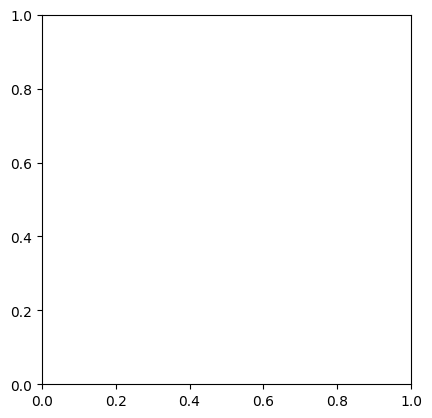

In [21]:
import matplotlib.pyplot as plt
plt.imshow(model.predict("/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/fightimage.png"))

In [22]:
model_path = "/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Final-train/weights/epoch14.pt"
model = YOLO(model_path)

In [25]:
success = model.export(format='ONNX')

Ultralytics YOLOv8.0.229 🚀 Python-3.11.4 torch-2.1.2 CPU (Apple M1)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Final-train/weights/epoch14.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 8, 13125) (296.7 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

ONNX: export failure ❌ 1.2s: No module named 'onnx'


ModuleNotFoundError: No module named 'onnx'

In [18]:
! pip3 install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=803f19a126e62e21afa1a6d575d70141e3be3b2b99f18ead7cc7e90b45956144
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


In [28]:
import cv2
import torch
# from models.yolo import Model
# from utils.general import non_max_suppression
from pytorch_yolo import non_max_suppression

# Set the path to your YOLOv8 model.h5 file
model_weights_path = '/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/Final-train/weights/best.onnx'

# Set the path to your single test image
image_path = '/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/fightimage.png'

# Load YOLOv8 model
model = YOLO("/Users/apple/Desktop/final_year_project/yolov8_custoum/Yolo_runs_custom-2/train/weights/epoch14.pt") 

# Set device (cuda if available, else cpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Read the single test image
image = cv2.imread(image_path)

# Perform inference
results = model(image)

# Apply non-maximum suppression to remove redundant bounding boxes
results = non_max_suppression(results, conf_thres=0.5, iou_thres=0.4)

# Draw bounding boxes on the image
if results[0] is not None:
    for box in results[0]:
        x, y, w, h = box[:4]
        label = int(box[5])
        confidence = box[4]

        # Draw bounding box and label on the image
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
        cv2.putText(image, f"Class {label} - {confidence:.2f}", (int(x), int(y) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the result
cv2.imshow('YOLOv8 Inference', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'pytorch_yolo'

In [41]:
! pip3 install net